<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dataset" data-toc-modified-id="Dataset-1">Dataset</a></span><ul class="toc-item"><li><span><a href="#Load" data-toc-modified-id="Load-1.1">Load</a></span></li><li><span><a href="#Split" data-toc-modified-id="Split-1.2">Split</a></span></li><li><span><a href="#Save" data-toc-modified-id="Save-1.3">Save</a></span></li><li><span><a href="#Visualize" data-toc-modified-id="Visualize-1.4">Visualize</a></span></li></ul></li><li><span><a href="#Neural-Architecture-Search" data-toc-modified-id="Neural-Architecture-Search-2">Neural Architecture Search</a></span><ul class="toc-item"><li><span><a href="#Reverse-problem" data-toc-modified-id="Reverse-problem-2.1">Reverse problem</a></span><ul class="toc-item"><li><span><a href="#Keras" data-toc-modified-id="Keras-2.1.1">Keras</a></span><ul class="toc-item"><li><span><a href="#Create-model" data-toc-modified-id="Create-model-2.1.1.1">Create model</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-2.1.1.2">Training</a></span></li></ul></li><li><span><a href="#QAT/QKeras" data-toc-modified-id="QAT/QKeras-2.1.2">QAT/QKeras</a></span><ul class="toc-item"><li><span><a href="#Create-model" data-toc-modified-id="Create-model-2.1.2.1">Create model</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-2.1.2.2">Training</a></span></li></ul></li><li><span><a href="#hls4ml" data-toc-modified-id="hls4ml-2.1.3">hls4ml</a></span><ul class="toc-item"><li><span><a href="#Convert-model" data-toc-modified-id="Convert-model-2.1.3.1">Convert model</a></span></li></ul></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-2.1.4">Evaluation</a></span></li></ul></li><li><span><a href="#Forward-problem" data-toc-modified-id="Forward-problem-2.2">Forward problem</a></span><ul class="toc-item"><li><span><a href="#Keras" data-toc-modified-id="Keras-2.2.1">Keras</a></span><ul class="toc-item"><li><span><a href="#Create-model" data-toc-modified-id="Create-model-2.2.1.1">Create model</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-2.2.1.2">Training</a></span></li></ul></li><li><span><a href="#QAT/QKeras" data-toc-modified-id="QAT/QKeras-2.2.2">QAT/QKeras</a></span><ul class="toc-item"><li><span><a href="#Create-model" data-toc-modified-id="Create-model-2.2.2.1">Create model</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-2.2.2.2">Training</a></span></li></ul></li><li><span><a href="#hls4ml" data-toc-modified-id="hls4ml-2.2.3">hls4ml</a></span><ul class="toc-item"><li><span><a href="#Convert-model" data-toc-modified-id="Convert-model-2.2.3.1">Convert model</a></span></li><li><span><a href="#Tracing-and-debugging" data-toc-modified-id="Tracing-and-debugging-2.2.3.2">Tracing and debugging</a></span></li></ul></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-2.2.4">Evaluation</a></span></li></ul></li></ul></li></ul></div>

# Appendix

## Dataset

### Load

In [1]:
import pandas as pd
from IPython.display import display

In [2]:
# Load data for our target gate family (rotations about Bloch sphere x-axis)
df = pd.read_csv("../data/xrotate.csv", header=None)

In [3]:
print(df.shape)

(101, 21)


In [4]:
display(df.head())

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.002061,0.013194,0.018057,0.015902,0.017745,0.017715,0.015825,0.018104,0.013197,0.002148,...,0.000103,0.000088,0.000078,0.000080,0.000031,0.000061,0.000126,3.431545e-05,0.000124,-3.141593
1,-0.002227,-0.013359,-0.017554,-0.015438,-0.017162,-0.017211,-0.015443,-0.017591,-0.013627,-0.001845,...,0.000072,0.000049,0.000033,0.000031,-0.000007,0.000022,0.000083,1.993576e-05,0.000100,-3.078761
2,-0.003243,-0.014217,-0.016003,-0.015864,-0.015976,-0.015975,-0.015850,-0.016015,-0.014253,-0.003144,...,0.000021,0.000005,-0.000008,-0.000011,-0.000030,-0.000011,0.000028,1.926120e-06,0.000052,-3.015929
3,-0.002533,-0.013236,-0.015930,-0.015621,-0.015832,-0.015857,-0.015657,-0.015920,-0.013301,-0.002484,...,-0.000042,-0.000021,0.000003,0.000015,0.000036,0.000008,-0.000044,-2.058282e-05,-0.000058,-2.953097
4,-0.003137,-0.013546,-0.015116,-0.015012,-0.015091,-0.015093,-0.015003,-0.015126,-0.013592,-0.003011,...,0.000029,0.000011,-0.000001,-0.000003,-0.000029,-0.000007,0.000039,2.099520e-08,0.000067,-2.890265


In [5]:
df.drop(0, inplace=True) # Remove row for beta=-pi (same alpha as beta=+pi)
df.drop(50, inplace=True) # Remove row for beta=0

In [6]:
display(df.head())

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
1,-0.002227,-0.013359,-0.017554,-0.015438,-0.017162,-0.017211,-0.015443,-0.017591,-0.013627,-0.001845,...,0.000072,0.000049,0.000033,0.000031,-0.000007,0.000022,0.000083,1.993576e-05,0.000100,-3.078761
2,-0.003243,-0.014217,-0.016003,-0.015864,-0.015976,-0.015975,-0.015850,-0.016015,-0.014253,-0.003144,...,0.000021,0.000005,-0.000008,-0.000011,-0.000030,-0.000011,0.000028,1.926120e-06,0.000052,-3.015929
3,-0.002533,-0.013236,-0.015930,-0.015621,-0.015832,-0.015857,-0.015657,-0.015920,-0.013301,-0.002484,...,-0.000042,-0.000021,0.000003,0.000015,0.000036,0.000008,-0.000044,-2.058282e-05,-0.000058,-2.953097
4,-0.003137,-0.013546,-0.015116,-0.015012,-0.015091,-0.015093,-0.015003,-0.015126,-0.013592,-0.003011,...,0.000029,0.000011,-0.000001,-0.000003,-0.000029,-0.000007,0.000039,2.099520e-08,0.000067,-2.890265
5,-0.003040,-0.013286,-0.014874,-0.014792,-0.014853,-0.014853,-0.014784,-0.014882,-0.013323,-0.002937,...,0.000026,0.000010,-0.000001,-0.000003,-0.000029,-0.000008,0.000036,-3.342383e-06,0.000065,-2.827433


In [7]:
print('Data set shape', df.shape)
print('- Entries', df.shape[0])
print('- Alphas ', df.shape[1]-1)
print('- Beta   ', 1)

Data set shape (99, 21)
- Entries 99
- Alphas  20
- Beta    1


### Split

In [8]:
import tensorflow as tf
print('Tensorflow ver.', tf.__version__)

Tensorflow ver. 2.4.0


In [9]:
from sklearn.model_selection import train_test_split

Dataset split is 60-20-20% training-validation-test set.

In [10]:
x_train, x_test, Y_train, Y_test = train_test_split(df.iloc[:,20], df.iloc[:,:20], test_size=0.2, random_state=5)
x_train, x_val, Y_train, Y_val = train_test_split(x_train, Y_train, test_size=0.25, random_state=5)

In [11]:
print('Train set shape: ', Y_train.shape)
print('Validation set shape: ', Y_val.shape)
print('Test set shape:  ', Y_test.shape)

Train set shape:  (59, 20)
Validation set shape:  (20, 20)
Test set shape:   (20, 20)


In [12]:
display(Y_train.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
93,0.002825,0.012658,0.014288,0.014167,0.014254,0.014262,0.014162,0.014301,0.012739,0.002758,0.000035,0.000026,0.000009,-0.000002,-0.000003,-0.000032,-0.000009,0.000039,-6.607097e-06,0.000074
97,0.003276,0.014032,0.015603,0.015447,0.015571,0.015574,0.015434,0.015617,0.014092,0.003215,0.000023,0.000020,0.000007,-0.000002,-0.000003,-0.000021,-0.000005,0.000027,6.929411e-07,0.000047
94,0.003032,0.013310,0.014901,0.014812,0.014876,0.014879,0.014807,0.014909,0.013354,0.003008,0.000028,0.000020,0.000005,-0.000004,-0.000005,-0.000028,-0.000010,0.000029,-6.402086e-06,0.000058
88,0.002284,0.010999,0.012722,0.012587,0.012671,0.012689,0.012599,0.012729,0.011112,0.002180,0.000037,0.000023,0.000005,-0.000005,-0.000004,-0.000036,-0.000012,0.000038,-1.172781e-05,0.000078
30,-0.001028,-0.005614,-0.006881,-0.006860,-0.006909,-0.006889,-0.006784,-0.006934,-0.005697,-0.000863,0.000042,0.000012,-0.000005,-0.000011,-0.000008,-0.000051,-0.000027,0.000026,-4.188584e-05,0.000091


### Save

In [13]:
import numpy as np
np.save('../data/appendix/x_train.npy', x_train)
np.save('../data/appendix/x_val.npy', x_val)
np.save('../data/appendix/x_test.npy', x_test)
np.save('../data/appendix/Y_train.npy', Y_train)
np.save('../data/appendix/Y_val.npy', Y_val)
np.save('../data/appendix/Y_test.npy', Y_test)

### Visualize

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

It is interesting to notice that the first ten pulses are on a wider range of values, while the second half of the pulses seem more limited.
- Is there an explanation?
- Can this be combined with reinforcement learning?
- Are all of the 20 pulses necessary? Can we have less pulses so a smaller model?

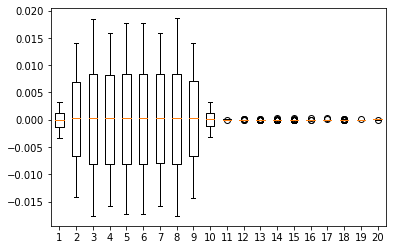

In [15]:
_ = plt.boxplot(df.iloc[:,:20], showfliers=True)

This is the second half.

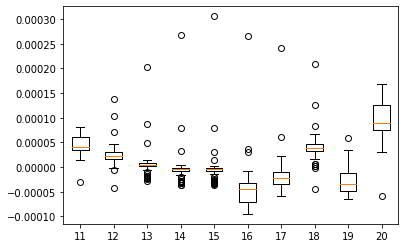

In [16]:
_ = plt.boxplot(df.iloc[:,10:20], showfliers=True, positions=np.arange(11,21,1))

This is the first entry in the dataset. Notice the difference between the first and second halfs of the pulses

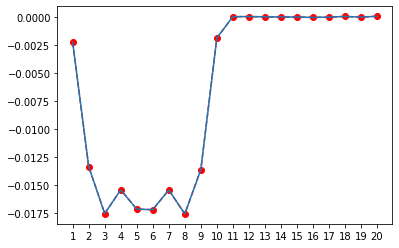

In [17]:
x = np.arange(1, 21, 1)
y = df.iloc[0:1,:20].to_numpy()[0]
plt.plot(x, y, marker='o', linestyle='--', color='r') 
plt.xticks(x, x)
plt.plot(x, y)
plt.show()

This is the second half of the first entry.

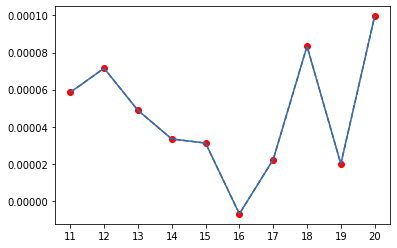

In [18]:
x = np.arange(11, 21, 1)
y = df.iloc[0:1,10:20].to_numpy()[0]
plt.plot(x, y, marker='o', linestyle='--', color='r') 
plt.xticks(x, x)
plt.plot(x, y)
plt.show()

Plot all of the entries in the dataset.

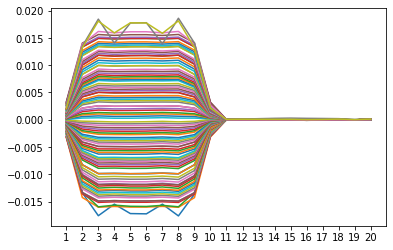

In [19]:
x = np.arange(1, 21, 1)
for i in range(99):
    y = df.iloc[i:i+1,:20].to_numpy()[0]
    plt.xticks(x, x)
    plt.plot(x, y)
plt.show()

And once again, plot only the second half for all of the entries in the dataset.

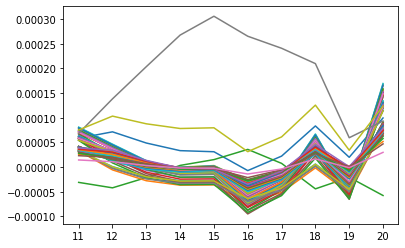

In [20]:
x = np.arange(11, 21, 1)
for i in range(99):
    y = df.iloc[i:i+1,10:20].to_numpy()[0]
    plt.xticks(x, x)
    plt.plot(x, y)
plt.show()

## Neural Architecture Search

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import os

# Disable some console warnings
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

### Reverse problem

#### Keras

##### Create model

In [22]:
model = Sequential()
model.add(Dense(20, input_shape=(20,), name='fc1', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu1'))
model.add(Dense(12, name='fc2', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu2'))
model.add(Dense(8, name='fc3', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu3'))
model.add(Dense(4, name='fc4', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu4'))
model.add(Dense(1, name='fc5', kernel_initializer='lecun_uniform'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 20)                420       
_________________________________________________________________
relu1 (Activation)           (None, 20)                0         
_________________________________________________________________
fc2 (Dense)                  (None, 12)                252       
_________________________________________________________________
relu2 (Activation)           (None, 12)                0         
_________________________________________________________________
fc3 (Dense)                  (None, 8)                 104       
_________________________________________________________________
relu3 (Activation)           (None, 8)                 0         
_________________________________________________________________
fc4 (Dense)                  (None, 4)                 3

In [24]:
from keras_sequential_ascii import keras2ascii
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####          20
               Dense   XXXXX -------------------       420    51.4%
                relu   #####          20
               Dense   XXXXX -------------------       252    30.8%
                relu   #####          12
               Dense   XXXXX -------------------       104    12.7%
                relu   #####           8
               Dense   XXXXX -------------------        36     4.4%
                relu   #####           4
               Dense   XXXXX -------------------         5     0.6%
                       #####           1


##### Training

In [25]:
#from callbacks import all_callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [26]:
train = False
if train:
    model.compile(optimizer=tf.optimizers.Adam(lr=0.001),
                  loss=tf.losses.MeanSquaredError(),
                  metrics=[
                      tf.metrics.MeanSquaredLogarithmicError(),
                      tf.metrics.MeanSquaredError(),
                      tf.metrics.MeanAbsolutePercentageError()
                  ])
    #callbacks = all_callbacks(stop_patience = 1000,
    #                          lr_factor = 0.5,
    #                          lr_patience = 100,
    #                          lr_epsilon = 0.000001,
    #                          lr_cooldown = 2,
    #                          lr_minimum = 0.0000001,
    #                          outputDir = '../model/forward_problem_training')
    #callbacks = all_callbacks(stop_patience = 100,
    #                          outputDir = '../model/forward_problem_training')
    early_stopping = EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=100,
                                   verbose=1)
    model_checkpoint = ModelCheckpoint(filepath='../model/appendix/reverse_problem_best_model.h5',
                         monitor='val_loss',
                         mode='min',
                         save_best_only=True)
    history = model.fit(Y_train,
                        x_train,
                        epochs=5000,
                        validation_data=(Y_val, x_val),
                        #callbacks=callbacks.callbacks,
                        callbacks=[early_stopping, model_checkpoint],
                        verbose=0)
    model.save("../model/appendix/reverse_problem_last_model.h5")
    # Load the best saved model and use it from now on
    model = load_model('../model/appendix/reverse_problem_best_model.h5')
else:
    from tensorflow.keras.models import load_model
    model = tf.keras.models.load_model('../model/appendix/reverse_problem_best_model.h5')

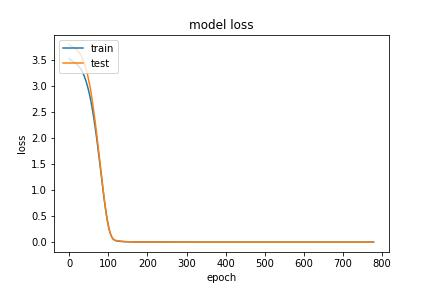

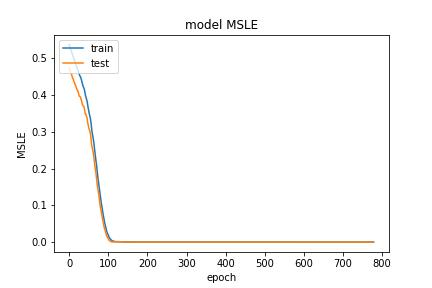

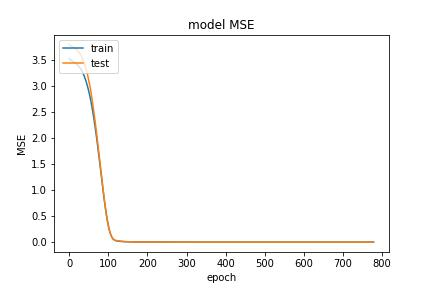

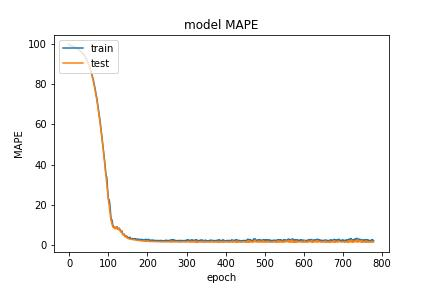

In [27]:
if train:
    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('../model/appendix/reverse_problem_history_loss.jpg')
    plt.show()

    # Summarize history for MSLE
    plt.plot(history.history['mean_squared_logarithmic_error'])
    plt.plot(history.history['val_mean_squared_logarithmic_error'])
    plt.title('model MSLE')
    plt.ylabel('MSLE')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('../model/appendix/reverse_problem_history_msle.jpg')
    plt.show()

    # Summarize history for MSE
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['val_mean_squared_error'])
    plt.title('model MSE')
    plt.ylabel('MSE')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('../model/appendix/reverse_problem_history_mse.jpg')
    plt.show()

    # Summarize history for MAPE
    plt.plot(history.history['mean_absolute_percentage_error'])
    plt.plot(history.history['val_mean_absolute_percentage_error'])
    plt.title('model MAPE')
    plt.ylabel('MAPE')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('../model/appendix/reverse_problem_history_mape.jpg')
    plt.show()
else:
    from PIL import Image

    img = Image.open('../model/appendix/reverse_problem_history_loss.jpg')
    display(img)
    
    img = Image.open('../model/appendix/reverse_problem_history_msle.jpg')
    display(img)
    
    img = Image.open('../model/appendix/reverse_problem_history_mse.jpg')
    display(img)
    
    img = Image.open('../model/appendix/reverse_problem_history_mape.jpg')
    display(img)

#### QAT/QKeras

##### Create model

In [28]:
import qkeras
from qkeras.qlayers import QDense, QActivation
from qkeras.quantizers import quantized_bits, quantized_relu

Remember that `ap_fixed<16, 8, true>` is `quantized_bits(bits=16,integer=7)`.

In [29]:
# Build quantized model
qmodel = tf.keras.models.Sequential()
qmodel.add(QDense(20,
                  input_shape=(20,),
                  name='fc1',
                  kernel_quantizer=quantized_bits(bits=16,integer=7,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=16,integer=7,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=16,integer=7,qnoise_factor=1.0),
                       name='relu1'))
qmodel.add(QDense(12,
                  name='fc2',
                  kernel_quantizer=quantized_bits(bits=16,integer=7,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=16,integer=7,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=16,integer=7,qnoise_factor=1.0),
                       name='relu2'))
qmodel.add(QDense(8,
                  name='fc3',
                  kernel_quantizer=quantized_bits(bits=16,integer=7,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=16,integer=7,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=16,integer=7,qnoise_factor=1.0),
                       name='relu3'))
qmodel.add(QDense(4,
                  name='fc4',
                  kernel_quantizer=quantized_bits(bits=16,integer=7,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=16,integer=7,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=16,integer=7,qnoise_factor=1.0),
                       name='relu4'))
qmodel.add(QDense(1,
                  name='fc5',
                  kernel_quantizer=quantized_bits(bits=16,integer=7,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=16,integer=7,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))

##### Training

In [30]:
#from callbacks import all_callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [31]:
train = False
if train:
    qmodel.compile(optimizer=tf.optimizers.Adam(lr=0.001),
                  loss=tf.losses.MeanSquaredError(),
                  metrics=[
                      tf.metrics.MeanSquaredLogarithmicError(),
                      tf.metrics.MeanSquaredError(),
                      tf.metrics.MeanAbsolutePercentageError()
                  ])
    #callbacks = all_callbacks(stop_patience = 1000,
    #                          lr_factor = 0.5,
    #                          lr_patience = 100,
    #                          lr_epsilon = 0.000001,
    #                          lr_cooldown = 2,
    #                          lr_minimum = 0.0000001,
    #                          outputDir = '../model/forward_problem_training')
    #callbacks = all_callbacks(stop_patience = 100,
    #                          outputDir = '../model/forward_problem_training')
    early_stopping = EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=100,
                                   verbose=1)
    model_checkpoint = ModelCheckpoint(filepath='../model/appendix/reverse_problem_best_qmodel.h5',
                         monitor='val_loss',
                         mode='min',
                         save_best_only=True)
    history = qmodel.fit(Y_train,
                        x_train,
                        epochs=5000,
                        validation_data=(Y_val, x_val),
                        #callbacks=callbacks.callbacks,
                        callbacks=[early_stopping, model_checkpoint],
                        verbose=0)
    qmodel.save("../model/appendix/reverse_problem_last_qmodel.h5")
    # Load the best saved model and use it from now on
    co = {}
    qkeras.utils._add_supported_quantized_objects(co)
    qmodel = tf.keras.models.load_model("../model/appendix/reverse_problem_best_qmodel.h5", custom_objects=co)
else:
    co = {}
    qkeras.utils._add_supported_quantized_objects(co)
    qmodel = tf.keras.models.load_model("../model/appendix/reverse_problem_best_qmodel.h5", custom_objects=co)

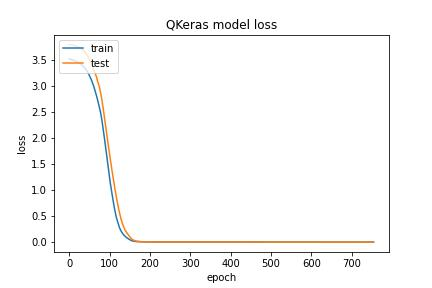

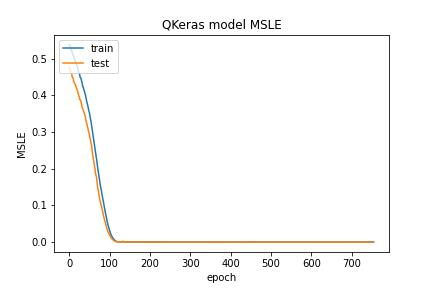

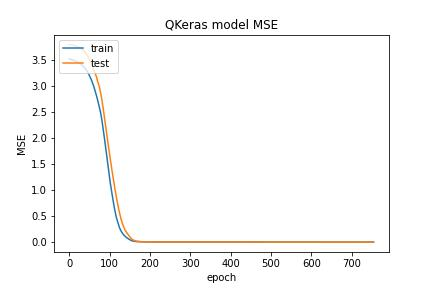

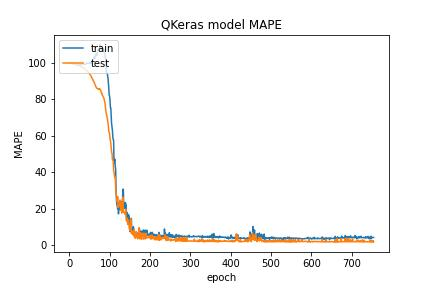

In [32]:
if train:
    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('QKeras model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('../model/appendix/reverse_problem_history_qloss.jpg')
    plt.show()

    # Summarize history for MSLE
    plt.plot(history.history['mean_squared_logarithmic_error'])
    plt.plot(history.history['val_mean_squared_logarithmic_error'])
    plt.title('QKeras model MSLE')
    plt.ylabel('MSLE')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('../model/appendix/reverse_problem_history_qmsle.jpg')
    plt.show()

    # Summarize history for MSE
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['val_mean_squared_error'])
    plt.title('QKeras model MSE')
    plt.ylabel('MSE')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('../model/appendix/reverse_problem_history_qmse.jpg')
    plt.show()

    # Summarize history for MAPE
    plt.plot(history.history['mean_absolute_percentage_error'])
    plt.plot(history.history['val_mean_absolute_percentage_error'])
    plt.title('QKeras model MAPE')
    plt.ylabel('MAPE')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('../model/appendix/reverse_problem_history_qmape.jpg')
    plt.show()
else:
    from PIL import Image

    img = Image.open('../model/appendix/reverse_problem_history_qloss.jpg')
    display(img)
    
    img = Image.open('../model/appendix/reverse_problem_history_qmsle.jpg')
    display(img)
    
    img = Image.open('../model/appendix/reverse_problem_history_qmse.jpg')
    display(img)
    
    img = Image.open('../model/appendix/reverse_problem_history_qmape.jpg')
    display(img)

#### hls4ml

##### Convert model

In [33]:
import hls4ml

/home/giuseppe/research/projects/quantum/hls4ml/hls4ml/converters/__init__.py:15: UserWarning: WARNING: Pytorch converter is not enabled!
  warnings.warn("WARNING: Pytorch converter is not enabled!")


In [34]:
print('hls4ml ver.', hls4ml.__version__)

hls4ml ver. 0.5.1


In [35]:
#hls4ml.model.optimizer.passes.qkeras.OutputRoundingSaturationMode.layers = ['Activation']
#hls4ml.model.optimizer.passes.qkeras.OutputRoundingSaturationMode.rounding_mode = 'AP_RND'
#hls4ml.model.optimizer.passes.qkeras.OutputRoundingSaturationMode.saturation_mode = 'AP_SAT'

In [36]:
print("-----------------------------------")
hconfig = hls4ml.utils.config_from_keras_model(qmodel, granularity='name')
print("-----------------------------------")

-----------------------------------
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: Input
Layer name: fc1, layer type: QDense
  -> Activation (linear), layer name: fc1
Layer name: relu1, layer type: QActivation
  -> Activation (quantized_relu), layer name: relu1
Layer name: fc2, layer type: QDense
  -> Activation (linear), layer name: fc2
Layer name: relu2, layer type: QActivation
  -> Activation (quantized_relu), layer name: relu2
Layer name: fc3, layer type: QDense
  -> Activation (linear), layer name: fc3
Layer name: relu3, layer type: QActivation
  -> Activation (quantized_relu), layer name: relu3
Layer name: fc4, layer type: QDense
  -> Activation (linear), layer name: fc4
Layer name: relu4, layer type: QActivation
  -> Activation (quantized_relu), layer name: relu4
Layer name: fc5, layer type: QDense
  -> Activation (linear), layer name: fc5
-----------------------------------


Show hls4ml configuration.

In [37]:
import plotting
print("-----------------------------------")
plotting.print_dict(hconfig)
print("-----------------------------------")

-----------------------------------
Model
  Precision:         ap_fixed<16,6>
  ReuseFactor:       1
  Strategy:          Latency
LayerName
  fc1_input
    Precision
      result:        ap_fixed<16,6>
  fc1
    Precision
      weight:        ap_fixed<16,8>
      bias:          ap_fixed<16,8>
    ReuseFactor:     1
  fc1_linear
    Precision:       ap_fixed<16,6>
    ReuseFactor:     1
    table_size:      1024
    table_t:         ap_fixed<18,8>
  relu1
    Precision
      result:        ap_ufixed<16,7>
    ReuseFactor:     1
  relu1_quantized_relu
    Precision
      result:        ap_ufixed<16,7>
    ReuseFactor:     1
  fc2
    Precision
      weight:        ap_fixed<16,8>
      bias:          ap_fixed<16,8>
    ReuseFactor:     1
  fc2_linear
    Precision:       ap_fixed<16,6>
    ReuseFactor:     1
    table_size:      1024
    table_t:         ap_fixed<18,8>
  relu2
    Precision
      result:        ap_ufixed<16,7>
    ReuseFactor:     1
  relu2_quantized_relu
    Precision
  

In [38]:
hmodel = hls4ml.converters.convert_from_keras_model(qmodel, hls_config=hconfig, output_dir='../model/hlsout/appendix/reverse', part='XC7A100T')

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 20]], output shape: [None, 20]
Layer name: fc1, layer type: QDense, input shapes: [[None, 20]], output shape: [None, 20]
Layer name: relu1, layer type: Activation, input shapes: [[None, 20]], output shape: [None, 20]
Layer name: fc2, layer type: QDense, input shapes: [[None, 20]], output shape: [None, 12]
Layer name: relu2, layer type: Activation, input shapes: [[None, 12]], output shape: [None, 12]
Layer name: fc3, layer type: QDense, input shapes: [[None, 12]], output shape: [None, 8]
Layer name: relu3, layer type: Activation, input shapes: [[None, 8]], output shape: [None, 8]
Layer name: fc4, layer type: QDense, input shapes: [[None, 8]], output shape: [None, 4]
Layer name: relu4, layer type: Activation, input shapes: [[None, 4]], output shape: [None, 4]
Layer name: fc5, layer type: QDense, input shapes: [[None, 4]], output shape: [None, 1]
Creating HLS model


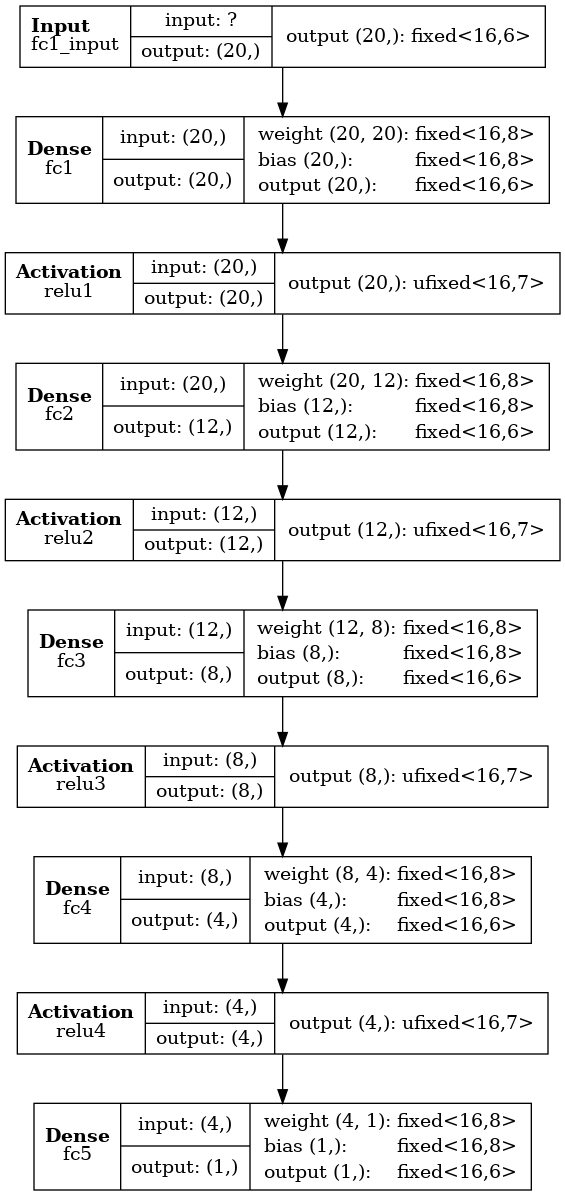

In [39]:
hls4ml.utils.plot_model(hmodel, show_shapes=True, show_precision=True, to_file=None)

In [40]:
hmodel.write()
hmodel.compile(False)

Writing HLS project
Done


#### Evaluation

Compute and compare the following metrics for the Keras and QKeras model
- Loss
- Mean Squared Logarithmic Error (MSLE)
- Mean Square Error (MSE)
- Mean Absolute Percentage Error (MAPE)

In [41]:
def eval_reverse_mse(a, b):
    accum = 0
    accum = (a-b)**2
    return accum

def eval_reverse_model_hls(model, x_test, Y_test):
    assert(len(x_test)==len(Y_test))
    N=len(x_test)
    accum = 0
    for i in range(N):
        expected = Y_test[i:i+1].to_numpy()[0]
        predicted = model.predict(np.ascontiguousarray(x_test.to_numpy()[i]))[0]
        accum += eval_reverse_mse(expected, predicted)
    return accum / len(x_test)

In [42]:
loss, msle, mse, mape = model.evaluate(Y_test, x_test)
qloss, qmsle, qmse, qmape = qmodel.evaluate(Y_test, x_test)
hmse = eval_reverse_model_hls(hmodel, Y_test, x_test)

1/1 [==============================] - 0s 286ms/step - loss: 7.0292e-04 - mean_squared_logarithmic_error: 6.0360e-05 - mean_squared_error: 7.0292e-04 - mean_absolute_percentage_error: 2.2189


In [43]:
with pd.option_context('display.float_format', '{:0.12f}'.format):
    data = pd.DataFrame([["Keras", loss, msle, mse, mape],["QKeras", qloss, qmsle, qmse, qmape],["hls4ml", "", "", hmse, ""]], columns=["", "Loss", "MSLE", "MSE", "MAPE"])
    display(data)

,,Loss,MSLE,MSE,MAPE
0,Keras,0.000669831235,0.000058342433,0.000669831235,1.947847366333
1,QKeras,0.000702922465,0.000060359704,0.000702922465,2.218930721283
2,hls4ml,,,0.040514586971,


Keep track of the metrics results in a CSV file.

In [44]:
import os
import csv

from datetime import datetime
now = datetime.now()
date_string = now.strftime("%d/%m/%Y %H:%M:%S")

write_csv=True
if write_csv:
    f = open('../model/appendix/reverse_problem_model.csv', 'a')
    writer = csv.writer(f)
    if os.stat("../model/appendix/reverse_problem_model.csv").st_size == 0:
        writer.writerow(["Date", "Framework", "Loss", "MSLE", "MSE", "MAPE"])
    writer.writerow([date_string, "Keras", loss, msle, mse, mape])
    writer.writerow([date_string, "QKeras", qloss, qmsle, qmse, qmape])
    writer.writerow([date_string, "hls4ml", "", "", hmse, ""])
    f.close()

Show current and previous results. The first row in the list are the oldest results.

In [45]:
import pandas as pd
with pd.option_context('display.float_format', '{:0.12f}'.format):
    csv_data = pd.read_csv('../model/appendix/reverse_problem_model.csv')
    display(csv_data)

,Date,Framework,Loss,MSLE,MSE,MAPE
0,02/08/2022 19:23:58,Keras,0.000669831235,0.000058342433,0.000669831235,1.947847366333
1,02/08/2022 19:23:58,QKeras,0.000702922465,0.000060359704,0.000702922465,2.218930721283
2,02/08/2022 19:23:58,hls4ml,NaN,NaN,0.039772176835,NaN
3,02/08/2022 19:27:06,Keras,0.000669831235,0.000058342433,0.000669831235,1.947847366333
4,02/08/2022 19:27:06,QKeras,0.000702922465,0.000060359704,0.000702922465,2.218930721283
5,02/08/2022 19:27:06,hls4ml,NaN,NaN,0.040514586971,NaN
6,02/08/2022 19:28:42,Keras,0.000669831235,0.000058342433,0.000669831235,1.947847366333
7,02/08/2022 19:28:42,QKeras,0.000702922465,0.000060359704,0.000702922465,2.218930721283
8,02/08/2022 19:28:42,hls4ml,NaN,NaN,0.040514586971,NaN
9,02/08/2022 19:45:30,Keras,0.000669831235,0.000058342433,0.000669831235,1.947847366333


In [46]:
x_keras = model.predict(Y_test)
x_qkeras = qmodel.predict(Y_test)
x_hls4ml = hmodel.predict(np.ascontiguousarray(np.array(Y_test.to_numpy())))

Plot and compare the Keras and QKeras predictions with the reference in the dataset.

In [47]:
for i in range(len(x_test)):
    print(x_test.to_numpy().reshape(len(x_test),1)[i][0], " / ", x_keras[i][0], " / ", x_qkeras[i][0], " / ", x_hls4ml[i][0])

1.1309733552923256  /  1.1091843  /  1.1095657  /  0.962890625
-1.0681415022205298  /  -1.0495735  /  -1.0537338  /  -1.203125
-0.1884955592153875  /  -0.19059172  /  -0.20193481  /  -0.4658203125
-1.319468914507713  /  -1.3157014  /  -1.3196335  /  -1.5419921875
1.6336281798666925  /  1.5793267  /  1.5708008  /  1.3935546875
-1.6336281798666925  /  -1.5792929  /  -1.5815125  /  -1.744140625
-2.4504422698000385  /  -2.4485853  /  -2.4285889  /  -2.6298828125
-1.82212373908208  /  -1.83273  /  -1.8366394  /  -2.0986328125
-2.010619298297468  /  -2.023766  /  -2.0173492  /  -2.1982421875
-0.8796459430051422  /  -0.9109607  /  -0.924057  /  -1.1630859375
3.078760800517997  /  3.1174877  /  3.1040878  /  3.0166015625
-0.7539822368615503  /  -0.76148045  /  -0.76168823  /  -1.01171875
1.382300767579509  /  1.3635204  /  1.3799667  /  1.1953125
-0.5654866776461628  /  -0.598866  /  -0.6038513  /  -0.7978515625
0.7539822368615503  /  0.76230013  /  0.75097656  /  0.595703125
-0.94247779607693

In [48]:
print('Expected number of plots (test set size):', Y_test.shape[0])

Expected number of plots (test set size): 20


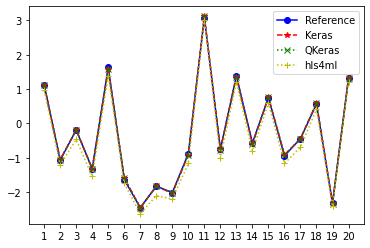

In [49]:
x = np.arange(1, len(x_test)+1, 1)
plt.clf()
plt.plot(x, x_test.to_numpy(), marker='o', linestyle='-', color='b') 
plt.plot(x, x_keras, marker='*', linestyle='--', color='r')
plt.plot(x, x_keras, marker='x', linestyle=':', color='g')
plt.plot(x, x_hls4ml, marker='+', linestyle=':', color='y')
plt.xticks(x, x)
plt.legend(['Reference', 'Keras', 'QKeras', 'hls4ml'], loc='upper right')
plt.show()

### Forward problem

#### Keras

##### Create model

In [50]:
model = Sequential()
model.add(Dense(4, input_shape=(1,), name='fc1', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu1'))
model.add(Dense(8, name='fc2e', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu2e'))
model.add(Dense(12, name='fc3', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu3'))
model.add(Dense(12, name='fc3e', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu3e'))
model.add(Dense(12, name='fc3e2', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu3e2'))
model.add(Dense(12, name='fc3e4', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu3e4'))
model.add(Dense(12, name='fc3e3', kernel_initializer='lecun_uniform'))
model.add(Activation(activation='relu', name='relu3e3'))
model.add(Dense(20, name='output', kernel_initializer='lecun_uniform'))

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 4)                 8         
_________________________________________________________________
relu1 (Activation)           (None, 4)                 0         
_________________________________________________________________
fc2e (Dense)                 (None, 8)                 40        
_________________________________________________________________
relu2e (Activation)          (None, 8)                 0         
_________________________________________________________________
fc3 (Dense)                  (None, 12)                108       
_________________________________________________________________
relu3 (Activation)           (None, 12)                0         
_________________________________________________________________
fc3e (Dense)                 (None, 12)               

In [52]:
from keras_sequential_ascii import keras2ascii
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####           1
               Dense   XXXXX -------------------         8     0.8%
                relu   #####           4
               Dense   XXXXX -------------------        40     3.8%
                relu   #####           8
               Dense   XXXXX -------------------       108    10.4%
                relu   #####          12
               Dense   XXXXX -------------------       156    15.0%
                relu   #####          12
               Dense   XXXXX -------------------       156    15.0%
                relu   #####          12
               Dense   XXXXX -------------------       156    15.0%
                relu   #####          12
               Dense   XXXXX -------------------       156    15.0%
                relu   #####          12
               Dense   XXXXX -------------------       260    25.0%
                       #####          20


##### Training

In [53]:
#from callbacks import all_callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [54]:
train = False
if train:
    model.compile(optimizer=tf.optimizers.Adam(lr=0.001),
                  loss=tf.losses.MeanSquaredError(),
                  metrics=[
                      tf.metrics.MeanSquaredLogarithmicError(),
                      tf.metrics.MeanSquaredError(),
                      tf.metrics.MeanAbsolutePercentageError()
                  ])
    #callbacks = all_callbacks(stop_patience = 1000,
    #                          lr_factor = 0.5,
    #                          lr_patience = 100,
    #                          lr_epsilon = 0.000001,
    #                          lr_cooldown = 2,
    #                          lr_minimum = 0.0000001,
    #                          outputDir = '../model/forward_problem_training')
    #callbacks = all_callbacks(stop_patience = 100,
    #                          outputDir = '../model/forward_problem_training')
    early_stopping = EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=100,
                                   verbose=0)
    model_checkpoint = ModelCheckpoint(filepath='../model/appendix/forward_problem_best_model.h5',
                         monitor='val_loss',
                         mode='min',
                         save_best_only=True)
    history = model.fit(x_train,
                        Y_train,
                        epochs=5000,
                        validation_data=(x_val, Y_val),
                        #callbacks=callbacks.callbacks,
                        callbacks=[early_stopping, model_checkpoint],
                        verbose=1)
    model.save("../model/appendix/forward_problem_last_model.h5")
    # Load the best saved model and use it from now on
    model = load_model('../model/appendix/forward_problem_best_model.h5')
else:
    from tensorflow.keras.models import load_model
    model = tf.keras.models.load_model('../model/appendix/forward_problem_best_model.h5')

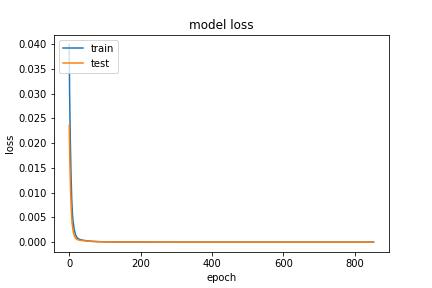

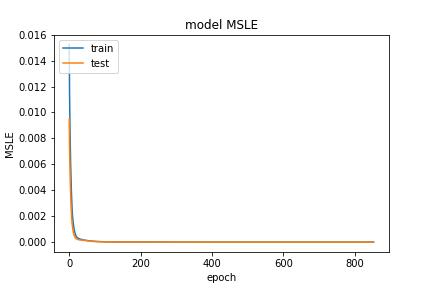

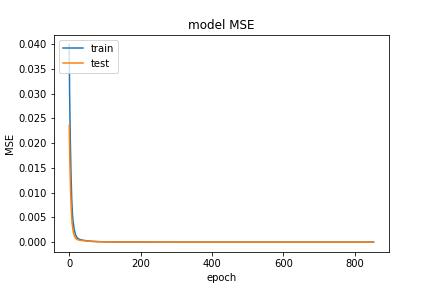

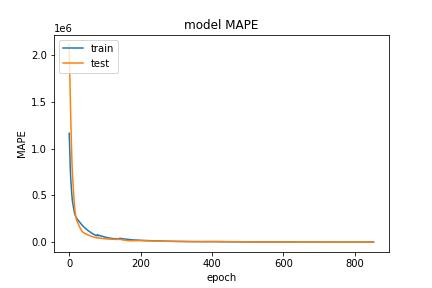

In [55]:
if train:
    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('../model/appendix/forward_problem_history_loss.jpg')
    plt.show()

    # Summarize history for MSLE
    plt.plot(history.history['mean_squared_logarithmic_error'])
    plt.plot(history.history['val_mean_squared_logarithmic_error'])
    plt.title('model MSLE')
    plt.ylabel('MSLE')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('../model/appendix/forward_problem_history_msle.jpg')
    plt.show()

    # Summarize history for MSE
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['val_mean_squared_error'])
    plt.title('model MSE')
    plt.ylabel('MSE')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('../model/appendix/forward_problem_history_mse.jpg')
    plt.show()

    # Summarize history for MAPE
    plt.plot(history.history['mean_absolute_percentage_error'])
    plt.plot(history.history['val_mean_absolute_percentage_error'])
    plt.title('model MAPE')
    plt.ylabel('MAPE')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('../model/appendix/forward_problem_history_mape.jpg')
    plt.show()
else:
    from PIL import Image

    img = Image.open('../model/appendix/forward_problem_history_loss.jpg')
    display(img)
    
    img = Image.open('../model/appendix/forward_problem_history_msle.jpg')
    display(img)
    
    img = Image.open('../model/appendix/forward_problem_history_mse.jpg')
    display(img)
    
    img = Image.open('../model/appendix/forward_problem_history_mape.jpg')
    display(img)

#### QAT/QKeras

##### Create model

In [56]:
import qkeras
from qkeras.qlayers import QDense, QActivation
from qkeras.quantizers import quantized_bits, quantized_relu

Remember that `ap_fixed<16, 8, true>` is `quantized_bits(bits=16,integer=7)`.

In [57]:
# Build quantized model
W=16
I=2

qmodel = tf.keras.models.Sequential()
qmodel.add(QDense(4,
                  input_shape=(1,),
                  name='fc1',
                  kernel_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=W,integer=I-1,qnoise_factor=1.0),
                       name='relu1'))
qmodel.add(QDense(8,
                  name='fc2',
                  kernel_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=W,integer=I-1,qnoise_factor=1.0),
                       name='relu2'))
qmodel.add(QDense(12,
                  name='fc3',
                  kernel_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=W,integer=I-1,qnoise_factor=1.0),
                       name='relu3'))
qmodel.add(QDense(12,
                  name='fc4',
                  kernel_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=W,integer=I-1,qnoise_factor=1.0),
                       name='relu4'))
qmodel.add(QDense(12,
                  name='fc5',
                  kernel_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=W,integer=I-1,qnoise_factor=1.0),
                       name='relu5'))
qmodel.add(QDense(12,
                  name='fc6',
                  kernel_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))
qmodel.add(QActivation(activation=quantized_relu(bits=W,integer=I-1,qnoise_factor=1.0),
                       name='relu6'))
qmodel.add(QDense(20,
                  name='fc7',
                  kernel_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  bias_quantizer=quantized_bits(bits=W,integer=I-1,alpha=1,qnoise_factor=1.0),
                  kernel_initializer='lecun_uniform'))

##### Training

In [58]:
#from callbacks import all_callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [59]:
train = False
if train:
    qmodel.compile(optimizer=tf.optimizers.Adam(lr=0.001),
                  loss=tf.losses.MeanSquaredError(),
                  metrics=[
                      tf.metrics.MeanSquaredLogarithmicError(),
                      tf.metrics.MeanSquaredError(),
                      tf.metrics.MeanAbsolutePercentageError()
                  ])
    #callbacks = all_callbacks(stop_patience = 1000,
    #                          lr_factor = 0.5,
    #                          lr_patience = 100,
    #                          lr_epsilon = 0.000001,
    #                          lr_cooldown = 2,
    #                          lr_minimum = 0.0000001,
    #                          outputDir = '../model/forward_problem_training')
    #callbacks = all_callbacks(stop_patience = 100,
    #                          outputDir = '../model/forward_problem_training')
    early_stopping = EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=100,
                                   verbose=1)
    model_checkpoint = ModelCheckpoint(filepath='../model/appendix/forward_problem_best_qmodel.h5',
                         monitor='val_loss',
                         mode='min',
                         save_best_only=True)
    history = qmodel.fit(x_train,
                        Y_train,
                        epochs=5000,
                        validation_data=(x_val, Y_val),
                        #callbacks=callbacks.callbacks,
                        callbacks=[early_stopping, model_checkpoint],
                        verbose=0)
    qmodel.save("../model/appendix/forward_problem_last_qmodel.h5")
    # Load the best saved model and use it from now on
    co = {}
    qkeras.utils._add_supported_quantized_objects(co)
    qmodel = tf.keras.models.load_model("../model/appendix/forward_problem_best_qmodel.h5", custom_objects=co)
else:
    co = {}
    qkeras.utils._add_supported_quantized_objects(co)
    qmodel = tf.keras.models.load_model("../model/appendix/forward_problem_best_qmodel.h5", custom_objects=co)

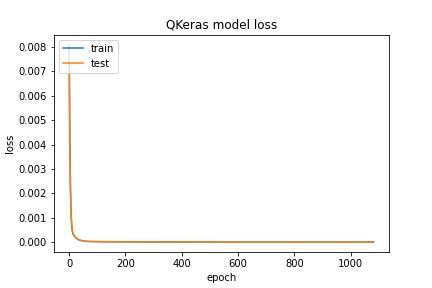

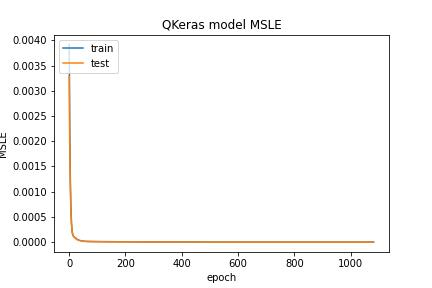

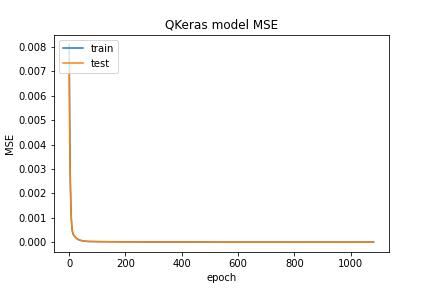

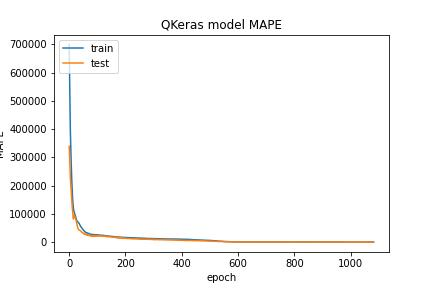

In [60]:
if train:
    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('QKeras model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('../model/appendix/forward_problem_history_qloss.jpg')
    plt.show()

    # Summarize history for MSLE
    plt.plot(history.history['mean_squared_logarithmic_error'])
    plt.plot(history.history['val_mean_squared_logarithmic_error'])
    plt.title('QKeras model MSLE')
    plt.ylabel('MSLE')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('../model/appendix/forward_problem_history_qmsle.jpg')
    plt.show()

    # Summarize history for MSE
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['val_mean_squared_error'])
    plt.title('QKeras model MSE')
    plt.ylabel('MSE')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('../model/appendix/forward_problem_history_qmse.jpg')
    plt.show()

    # Summarize history for MAPE
    plt.plot(history.history['mean_absolute_percentage_error'])
    plt.plot(history.history['val_mean_absolute_percentage_error'])
    plt.title('QKeras model MAPE')
    plt.ylabel('MAPE')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('../model/appendix/forward_problem_history_qmape.jpg')
    plt.show()
else:
    from PIL import Image

    img = Image.open('../model/appendix/forward_problem_history_qloss.jpg')
    display(img)
    
    img = Image.open('../model/appendix/forward_problem_history_qmsle.jpg')
    display(img)
    
    img = Image.open('../model/appendix/forward_problem_history_qmse.jpg')
    display(img)
    
    img = Image.open('../model/appendix/forward_problem_history_qmape.jpg')
    display(img)

#### hls4ml

##### Convert model

In [61]:
import hls4ml

In [62]:
print('hls4ml ver.', hls4ml.__version__)

hls4ml ver. 0.5.1


In [63]:
#hls4ml.model.optimizer.OutputRoundingSaturationMode.layers = ['Activation']
#hls4ml.model.optimizer.OutputRoundingSaturationMode.rounding_mode = 'AP_RND'
#hls4ml.model.optimizer.OutputRoundingSaturationMode.saturation_mode = 'AP_SAT'

In [64]:
print("-----------------------------------")
hconfig = hls4ml.utils.config_from_keras_model(qmodel, granularity='name')
#hconfig['LayerName']['fc1']['Precision']['result'] = 'ap_fixed<32,2>'
# hconfig['LayerName']['fc2']['Precision']['result'] = 'ap_fixed<32,16,AP_RND,AP_SAT>'
# hconfig['LayerName']['fc3']['Precision']['result'] = 'ap_fixed<32,16,AP_RND,AP_SAT>'
# hconfig['LayerName']['fc4']['Precision']['result'] = 'ap_fixed<32,16,AP_RND,AP_SAT>'
# hconfig['LayerName']['fc5']['Precision']['result'] = 'ap_fixed<32,16,AP_RND,AP_SAT>'
# hconfig['LayerName']['fc6']['Precision']['result'] = 'ap_fixed<32,16,AP_RND,AP_SAT>'
# hconfig['LayerName']['relu1']['Precision']['result'] = 'ap_fixed<32,16,AP_RND,AP_SAT>'
# hconfig['LayerName']['relu2']['Precision']['result'] = 'ap_fixed<32,16,AP_RND,AP_SAT>'
# hconfig['LayerName']['relu3']['Precision']['result'] = 'ap_fixed<32,16,AP_RND,AP_SAT>'
# hconfig['LayerName']['relu4']['Precision']['result'] = 'ap_fixed<32,16,AP_RND,AP_SAT>'
# hconfig['LayerName']['relu5']['Precision']['result'] = 'ap_fixed<32,16,AP_RND,AP_SAT>'
# hconfig['LayerName']['relu6']['Precision']['result'] = 'ap_fixed<32,16,AP_RND,AP_SAT>'
print("-----------------------------------")

-----------------------------------
Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: Input
Layer name: fc1, layer type: QDense
  -> Activation (linear), layer name: fc1
Layer name: relu1, layer type: QActivation
  -> Activation (quantized_relu), layer name: relu1
Layer name: fc2, layer type: QDense
  -> Activation (linear), layer name: fc2
Layer name: relu2, layer type: QActivation
  -> Activation (quantized_relu), layer name: relu2
Layer name: fc3, layer type: QDense
  -> Activation (linear), layer name: fc3
Layer name: relu3, layer type: QActivation
  -> Activation (quantized_relu), layer name: relu3
Layer name: fc4, layer type: QDense
  -> Activation (linear), layer name: fc4
Layer name: relu4, layer type: QActivation
  -> Activation (quantized_relu), layer name: relu4
Layer name: fc5, layer type: QDense
  -> Activation (linear), layer name: fc5
Layer name: relu5, layer type: QActivation
  -> Activation (quantized_relu), layer name: relu5
Layer name: fc6, layer t

Show hls4ml configuration.

In [65]:
import plotting
print("-----------------------------------")
plotting.print_dict(hconfig)
print("-----------------------------------")

-----------------------------------
Model
  Precision:         ap_fixed<16,6>
  ReuseFactor:       1
  Strategy:          Latency
LayerName
  fc1_input
    Precision
      result:        ap_fixed<16,6>
  fc1
    Precision
      weight:        ap_fixed<16,2>
      bias:          ap_fixed<16,2>
    ReuseFactor:     1
  fc1_linear
    Precision:       ap_fixed<16,6>
    ReuseFactor:     1
    table_size:      1024
    table_t:         ap_fixed<18,8>
  relu1
    Precision
      result:        ap_ufixed<16,1>
    ReuseFactor:     1
  relu1_quantized_relu
    Precision
      result:        ap_ufixed<16,1>
    ReuseFactor:     1
  fc2
    Precision
      weight:        ap_fixed<16,2>
      bias:          ap_fixed<16,2>
    ReuseFactor:     1
  fc2_linear
    Precision:       ap_fixed<16,6>
    ReuseFactor:     1
    table_size:      1024
    table_t:         ap_fixed<18,8>
  relu2
    Precision
      result:        ap_ufixed<16,1>
    ReuseFactor:     1
  relu2_quantized_relu
    Precision
  

In [66]:
hmodel = hls4ml.converters.convert_from_keras_model(qmodel, hls_config=hconfig, output_dir='../model/hlsout/appendix/forward', part='XC7A100T')

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 1]], output shape: [None, 1]
Layer name: fc1, layer type: QDense, input shapes: [[None, 1]], output shape: [None, 4]
Layer name: relu1, layer type: Activation, input shapes: [[None, 4]], output shape: [None, 4]
Layer name: fc2, layer type: QDense, input shapes: [[None, 4]], output shape: [None, 8]
Layer name: relu2, layer type: Activation, input shapes: [[None, 8]], output shape: [None, 8]
Layer name: fc3, layer type: QDense, input shapes: [[None, 8]], output shape: [None, 12]
Layer name: relu3, layer type: Activation, input shapes: [[None, 12]], output shape: [None, 12]
Layer name: fc4, layer type: QDense, input shapes: [[None, 12]], output shape: [None, 12]
Layer name: relu4, layer type: Activation, input shapes: [[None, 12]], output shape: [None, 12]
Layer name: fc5, layer type: QDense, input shapes: [[None, 12]], output shape: [None, 12]
Layer name: relu5, layer type: Activation, 

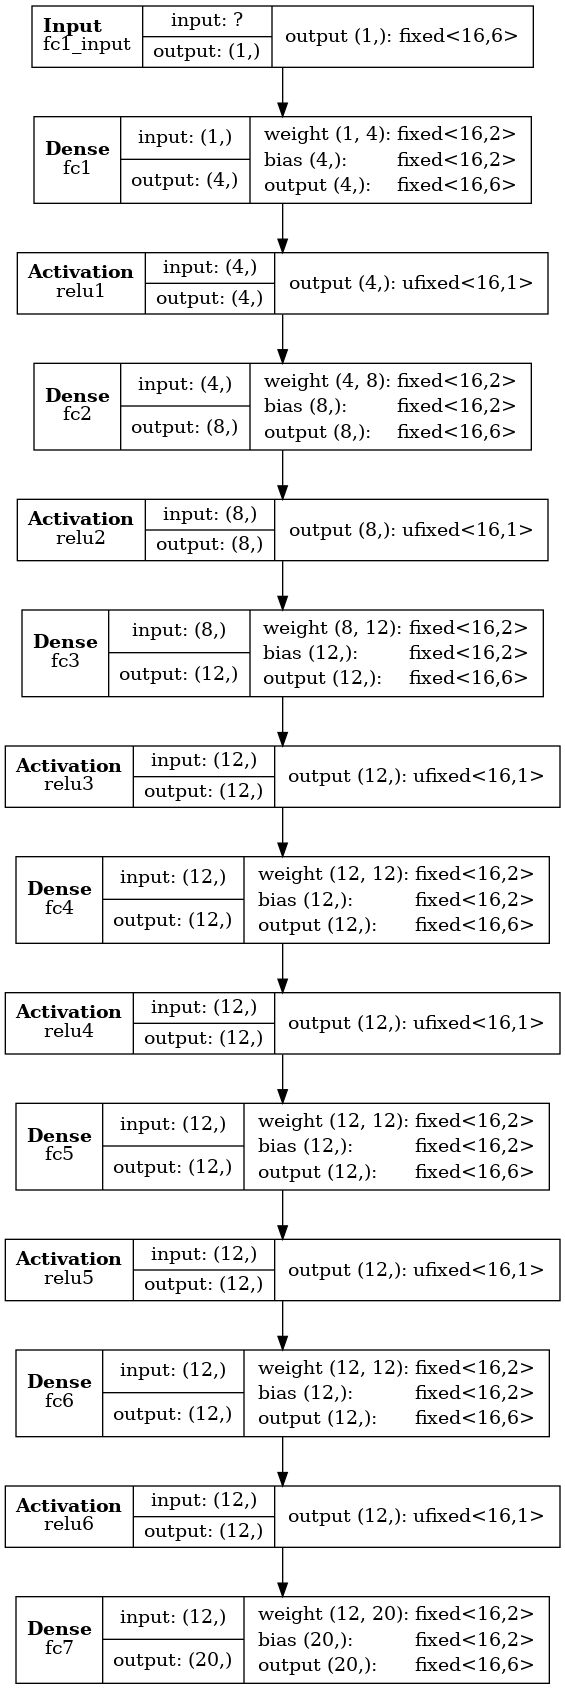

In [67]:
hls4ml.utils.plot_model(hmodel, show_shapes=True, show_precision=True, to_file=None)

In [84]:
#hmodel.write()
hmodel.compile(False)
### MANUAL EDIT THE HLS4ML PROJECT!!!!!

##### Tracing and debugging

#### Evaluation

Compute and compare the following metrics for the Keras and QKeras model
- Loss
- Mean Squared Logarithmic Error (MSLE)
- Mean Square Error (MSE)
- Mean Absolute Percentage Error (MAPE)

In [85]:
def eval_forward_mse(a, b):
    assert(len(a)==len(b))
    M=len(a)
    accum = 0
    for i in range(len(a)):
        accum += (a[i]-b[i])**2
    return accum/len(a)

def eval_forward_model_hls(model, x_test, Y_test):
    assert(len(x_test)==len(Y_test))
    N=len(x_test)
    accum = 0
    for i in range(N):
        expected = Y_test[i:i+1].to_numpy()[0]
        predicted = model.predict(np.ascontiguousarray(x_test.to_numpy()[i]))
        accum += eval_forward_mse(expected, predicted)
    return accum / len(x_test)

In [86]:
loss, msle, mse, mape = model.evaluate(x_test[:2], Y_test[:2])
qloss, qmsle, qmse, qmape = qmodel.evaluate(x_test[:2], Y_test[:2])
hmse = eval_forward_model_hls(hmodel, x_test[:2], Y_test[:2])

1/1 [==============================] - 0s 10ms/step - loss: 5.2698e-09 - mean_squared_logarithmic_error: 2.2127e-09 - mean_squared_error: 5.2698e-09 - mean_absolute_percentage_error: 67.7779


In [87]:
with pd.option_context('display.float_format', '{:0.12f}'.format):
    data = pd.DataFrame([["Keras", loss, msle, mse, mape],["QKeras", qloss, qmsle, qmse, qmape],["hls4ml", "", "", hmse, ""]], columns=["", "Loss", "MSLE", "MSE", "MAPE"])
    display(data)

,,Loss,MSLE,MSE,MAPE
0,Keras,0.000000008552,0.000000003580,0.000000008552,91.520606994629
1,QKeras,0.000000005270,0.000000002213,0.000000005270,67.777862548828
2,hls4ml,,,0.000000004968,


Keep track of the metrics results in a CSV file.

In [88]:
import os
import csv

from datetime import datetime
now = datetime.now()
date_string = now.strftime("%d/%m/%Y %H:%M:%S")

write_csv=True
if write_csv:
    f = open('../model/appendix/forward_problem_model.csv', 'a')
    writer = csv.writer(f)
    if os.stat("../model/appendix/forward_problem_model.csv").st_size == 0:
        writer.writerow(["Date", "Framework", "Loss", "MSLE", "MSE", "MAPE"])
    writer.writerow([date_string, "Keras", loss, msle, mse, mape])
    writer.writerow([date_string, "QKeras", qloss, qmsle, qmse, qmape])
    writer.writerow([date_string, "hls4ml", "", "", hmse, ""])
    f.close()

Show current and previous results. The first row in the list are the oldest results.

In [89]:
import pandas as pd
with pd.option_context('display.float_format', '{:0.12f}'.format):
    csv_data = pd.read_csv('../model/appendix/forward_problem_model.csv')
    display(csv_data)

,Date,Framework,Loss,MSLE,MSE,MAPE
0,02/08/2022 19:24:04,Keras,0.000000008552,0.000000003580,0.000000008552,91.520606994629
1,02/08/2022 19:24:04,QKeras,0.000000005270,0.000000002213,0.000000005270,67.777862548828
2,02/08/2022 19:24:04,hls4ml,NaN,NaN,0.000001106008,NaN
3,02/08/2022 19:27:44,Keras,0.000000008552,0.000000003580,0.000000008552,91.520606994629
4,02/08/2022 19:27:44,QKeras,0.000000005270,0.000000002213,0.000000005270,67.777862548828
5,02/08/2022 19:27:44,hls4ml,NaN,NaN,0.000001106008,NaN
6,02/08/2022 19:28:48,Keras,0.000000008552,0.000000003580,0.000000008552,91.520606994629
7,02/08/2022 19:28:48,QKeras,0.000000005270,0.000000002213,0.000000005270,67.777862548828
8,02/08/2022 19:28:48,hls4ml,NaN,NaN,0.000001106008,NaN
9,02/08/2022 20:26:04,Keras,0.000000008552,0.000000003580,0.000000008552,91.520606994629


In [90]:
Y_keras = model.predict(x_test)
Y_qkeras = qmodel.predict(x_test)
Y_hls4ml = hmodel.predict(np.array(x_test.to_numpy()).reshape((len(x_test), 1)))

Plot and compare the Keras and QKeras predictions with the reference in the dataset.

In [91]:
print('Expected number of plots (test set size):', Y_test.shape[0])

Expected number of plots (test set size): 20


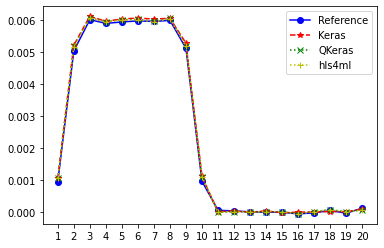

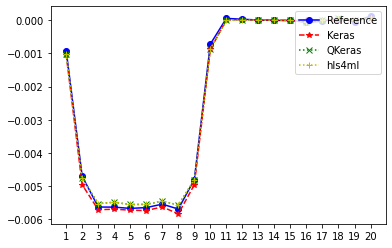

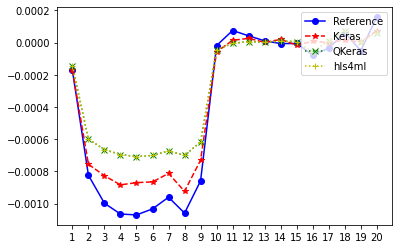

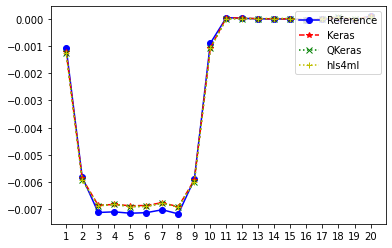

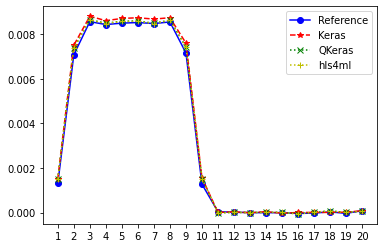

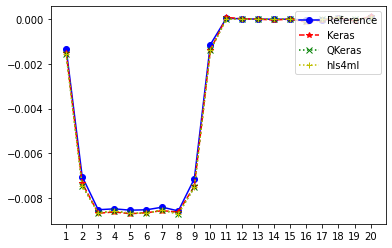

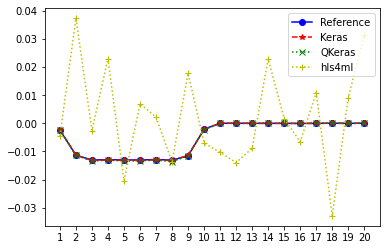

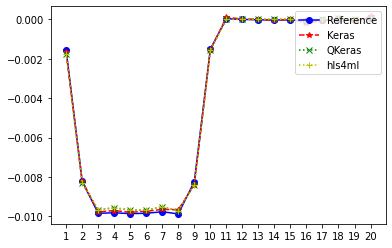

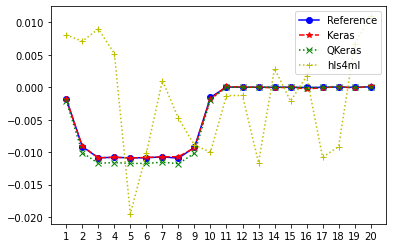

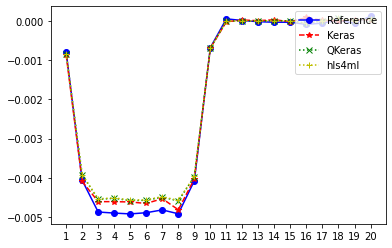

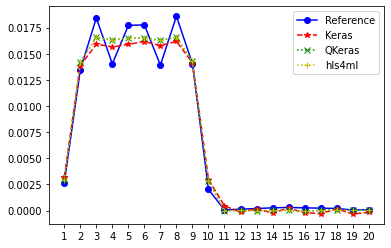

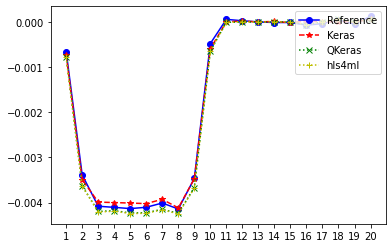

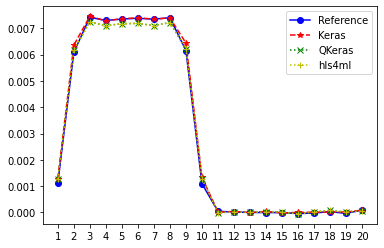

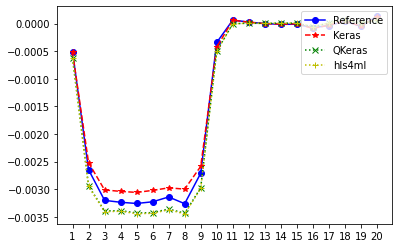

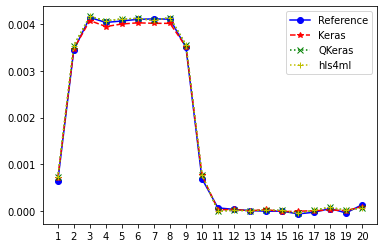

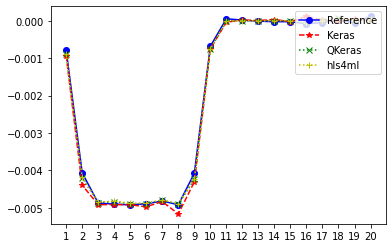

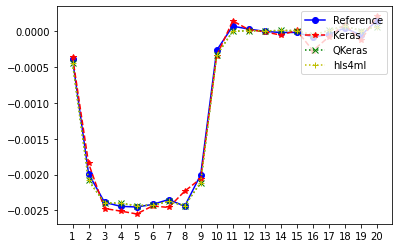

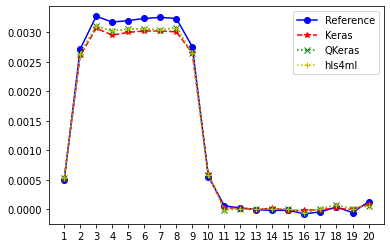

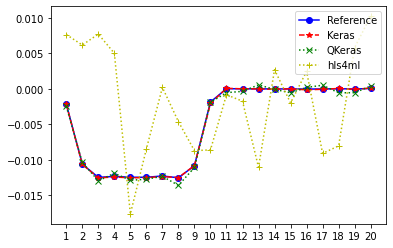

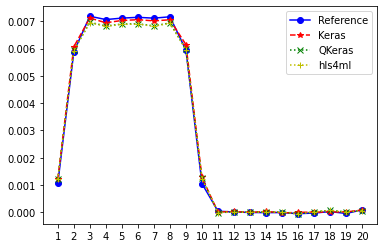

In [92]:
x = np.arange(1, 21, 1)
for i in range(len(Y_test)):
    plt.clf()
    plt.plot(x, Y_test.to_numpy()[i], marker='o', linestyle='-', color='b') 
    plt.plot(x, Y_keras[i], marker='*', linestyle='--', color='r')
    plt.plot(x, Y_qkeras[i], marker='x', linestyle=':', color='g')
    plt.plot(x, Y_hls4ml[i], marker='+', linestyle=':', color='y')
    plt.xticks(x, x)
    plt.legend(['Reference', 'Keras', 'QKeras','hls4ml'], loc='upper right')
    plt.show()